In [2]:
import numpy as np
import matplotlib.pyplot as plt
import illustris_python as il


In [27]:
def calc_from_snap(basePath,snapNum):
    subs = il.groupcat.loadSubhalos(basePath,snapNum,fields=['SubhaloLenType','SubhaloMassType',
                                                             'SubhaloMassInHalfRadType','SubhaloMassInRadType'])
    mstar = subs['SubhaloMassType'][:,4]*1.0e10/0.704
    Ngas = subs['SubhaloLenType'][:,0]
    Ndm = subs['SubhaloLenType'][:,1]
    Nstar = subs['SubhaloLenType'][:,4]
    Nbh = subs['SubhaloLenType'][:,5]
    
    mstar = mstar[(Ngas>100)&(Ndm>100)&(Nstar>100)&(Nbh>0)]
    lgmstar = np.log10(mstar)
    print(lgmstar.min(),lgmstar.max())
    mstar_hist, bin_edges = np.histogram(lgmstar, bins=20)
    binsize = bin_edges[1:] - bin_edges[:-1]
    box_vol_mpc = 1357213.6324803103 # TNG100
    gsmf = mstar_hist / binsize / box_vol_mpc
    print(gsmf)
    print(bin_edges)
    return gsmf, bin_edges

In [28]:
basePath = '/orange/lblecha/IllustrisTNG/Runs/TNG100-1/output/'
snapNum = 99
gsmf_snap99, bin_edges_snap99 = calc_from_snap(basePath,snapNum)

7.970891 12.55213
[5.52613825e-03 9.90072964e-03 1.16795157e-02 1.20494762e-02
 1.13353383e-02 1.00776433e-02 9.02581136e-03 6.88033161e-03
 6.08582862e-03 4.79596748e-03 3.93071540e-03 3.45785717e-03
 2.08436414e-03 1.17406313e-03 5.88639872e-04 2.92711630e-04
 1.38314863e-04 8.36318943e-05 2.89495019e-05 1.28664453e-05]
[ 7.970891   8.199953   8.429015   8.658077   8.887138   9.1162
  9.345263   9.574325   9.803387  10.032449  10.261511  10.490572
 10.719634  10.948696  11.177758  11.40682   11.635882  11.8649435
 12.094006  12.323068  12.55213  ]


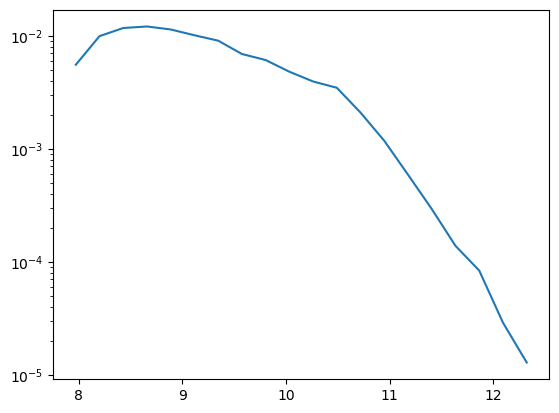

In [29]:
plt.yscale('log')
plt.plot(bin_edges_snap99[:-1],gsmf_snap99)

In [28]:
from holodeck import cosmo, utils   # , log
import matplotlib.pyplot as plt

In [41]:
x = np.arange(0,5,1)
print(x)
#y = np.arange(0,7,0.5)
#z = np.arange(0,8,0.5)
#f = x[:, np.newaxis, np.newaxis]**2 + y[np.newaxis, :, np.newaxis]**2 +z[np.newaxis, np.newaxis, :]**2
#print(f.shape)
#integ = utils.trapz(f, x, axis=0, cumsum=False)
integ = utils.trapz(x, x, axis=0, cumsum=False) # cumsum=False gives integral just in this x bin
print(integ.shape)
#integ = utils.trapz(integ, y, axis=1, cumsum=True)
#print(integ.shape)
#integ = utils.trapz(integ, z, axis=2, cumsum=True)
print(integ)
integ2 = utils.trapz(x, x, cumsum=True) #cumsum=True gives total integral from xmin to x
integ3 = np.trapz(x, x)
print(integ2)
print(integ3)

[0 1 2 3 4]
(4,)
[0.5 1.5 2.5 3.5]
[0.5 2.  4.5 8. ]
8.0


ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

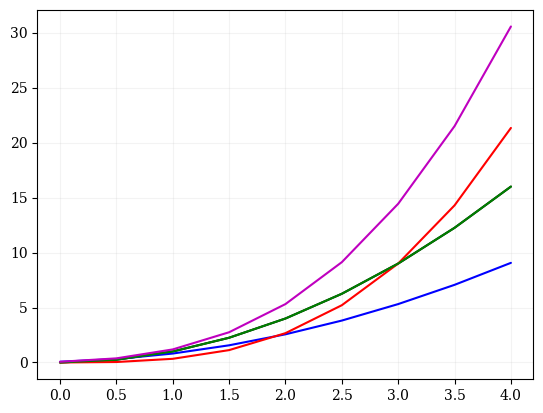

In [35]:
plt.plot(x[:-1],f[:-1,0,0],'k')
plt.plot(x[:-1],integ[:,0,0],'b')
plt.plot(x[:-1],x[:-1]**3/3,'r')
plt.plot(x[:-1],x[:-1]**2,'g')
plt.plot(x[:-1],integ2,'m')
plt.plot(x[:-1],integ3,'darkorange')

In [42]:
np.log(10)

2.302585092994046